In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from polire.interpolate import *

from polire.custom import CustomInterpolator
import xgboost
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import colors
import seaborn as sns
import sys

In [3]:
df = pd.read_csv("../../daily_44201_2018.csv")

In [4]:
df.head(3)

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,21,NaN,-,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2019-02-12
1,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,30,NaN,-,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2019-02-12
2,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,41,NaN,-,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2019-02-12


In [5]:
some_value = 'Ozone'
df = df.loc[df['Parameter Name'] == some_value]

some_value = '2018-05-07'
df = df.loc[df['Date Local'] == some_value]

df = df.sample(frac=1)
df.shape

(1240, 29)

In [6]:
df_train, df_test = train_test_split(df, test_size=0.2)
df_train.head()

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
292720,39,167,4,44201,1,39.432117,-81.460443,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,58,NaN,-,Marietta WTP,2000 4TH STREET,Ohio,Washington,Marietta,"Marietta, OH",2019-01-29
399503,56,37,77,44201,1,41.158000,-108.619000,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,67,NaN,-,Hiawatha,Hiawatha Green Site,Wyoming,Sweetwater,Not in a city,"Rock Springs, WY",2019-02-25
159073,18,167,24,44201,1,39.558525,-87.312883,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,51,NaN,-,Sandcut/ SITE LOCATED BY HOME BEHIND SHED.,7597 N. STEVENSON RD/ SANDCUT,Indiana,Vigo,Not in a city,"Terre Haute, IN",2019-01-09
249423,35,13,8,44201,2,31.930659,-106.631103,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,54,NaN,-,6O La Union,"7048 McNutt, La Union, NM",New Mexico,Dona Ana,Not in a city,"Las Cruces, NM",2019-04-09
204274,26,81,22,44201,1,43.176672,-85.416608,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,46,NaN,-,APPROXIMATELY 1/4 MILE SOUTH OF 14 MILE RD,10300 14 MILE RD NE #B,Michigan,Kent,Not in a city,"Grand Rapids-Wyoming, MI",2019-03-05


In [7]:
r = Random(resolution='standard')
trainX = df_train[['Longitude', 'Latitude']].values
trainy = df_train['Arithmetic Mean'].values
r.fit(trainX, trainy)

Random

In [8]:
testX = df_test[['Longitude', 'Latitude']].values
testy = df_test['Arithmetic Mean'].values

In [9]:
x1max, x2max = np.max(trainX, axis=0)
print (x1max, x2max)
x1min, x2min = np.min(trainX, axis=0)

-66.126531 64.84568999999999


In [10]:
x1min, x1max, x2min, x2max

(-158.08861299999998, -66.126531, 18.440774, 64.84568999999999)

In [11]:
lss = [
    Random(),
    SpatialAverage(),
    BSpline(kx=2, ky=2),
    Trend(order=2),
    Idw(),
    Kriging(),
    CustomInterpolator(xgboost.XGBRegressor),
    CustomInterpolator(RandomForestRegressor),
    CustomInterpolator(LinearRegression, reg_kwargs={"normalize": True}),
    CustomInterpolator(
        KNeighborsRegressor, reg_kwargs={"n_neighbors": 3, "weights": "distance"}
    ),
    CustomInterpolator(
        GaussianProcessRegressor, reg_kwargs={"normalize_y": True, "kernel": Matern()}
    ),
    CustomInterpolator(
        MLPRegressor,
        reg_kwargs={
            'hidden_layer_sizes': 32
        }
    )
]

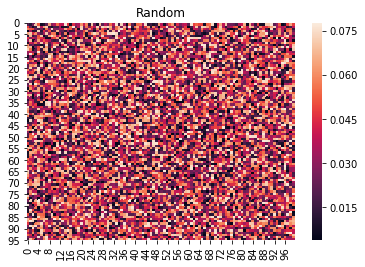

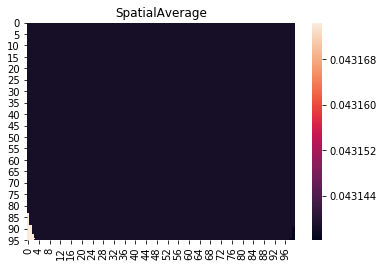

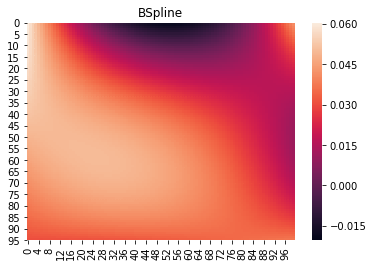

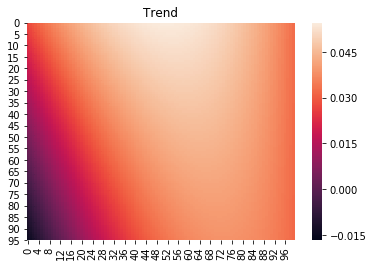

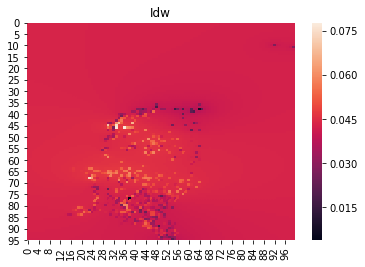

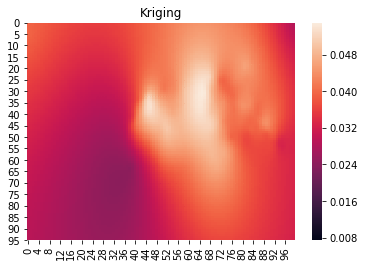

[00:48:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


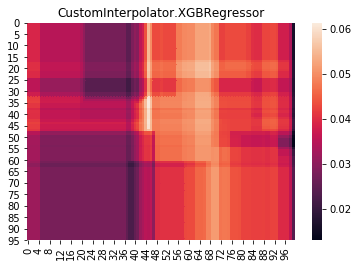

/home/apoorv/Desktop/github/polire/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


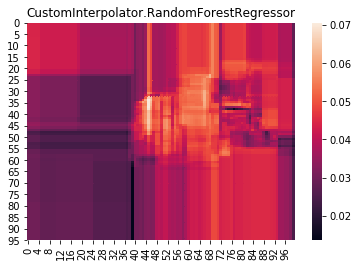

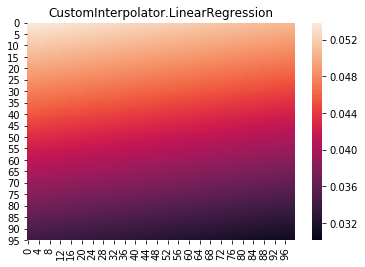

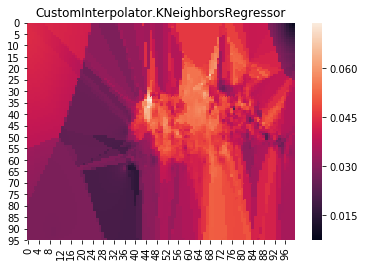

/home/apoorv/Desktop/github/polire/.env/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.61252415]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 67, 'nit': 5, 'warnflag': 2}
  ConvergenceWarning)


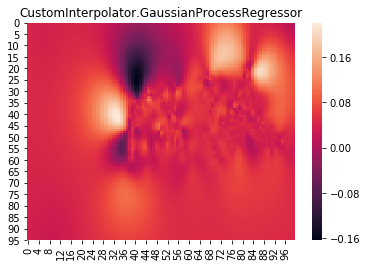

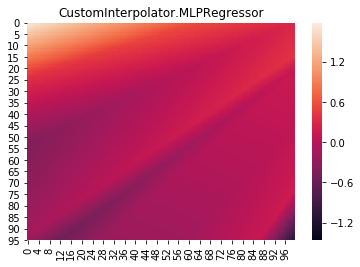

In [12]:
for r in lss:
    r.fit(trainX, trainy)
    Z = r.predict_grid((x1min, x1max), (x2min, x2max)).reshape(100, 100)
    sns.heatmap(Z)
    plt.title(r)
    plt.show()
    plt.close()


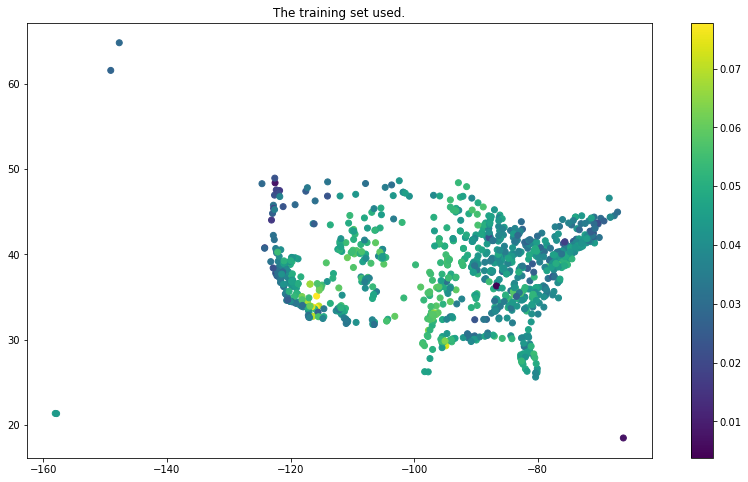

In [13]:
plt.figure(figsize=(14, 8))
h = plt.scatter(trainX[:, 0], trainX[:, 1], c = trainy)
plt.title("The training set used.")
plt.colorbar(h)

In [14]:
outputs = []

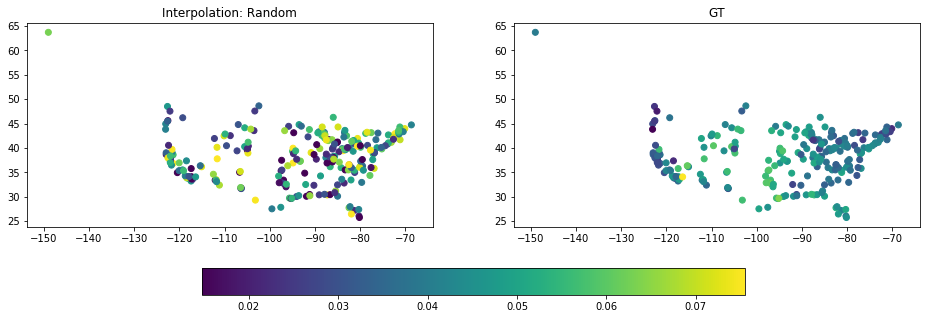

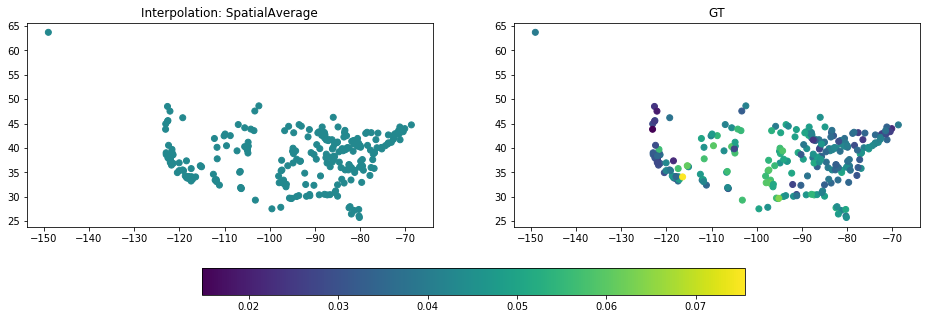

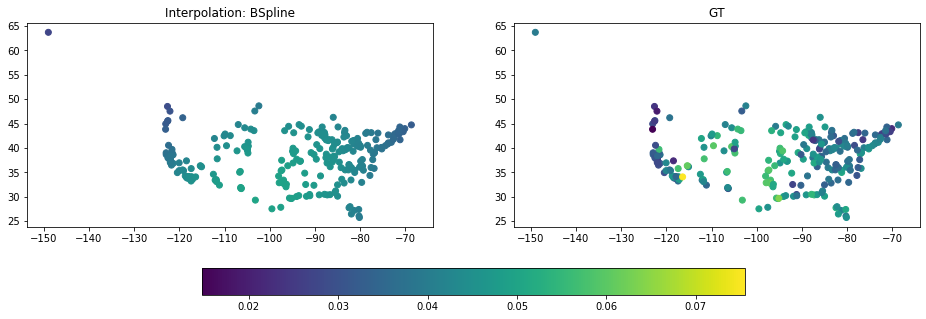

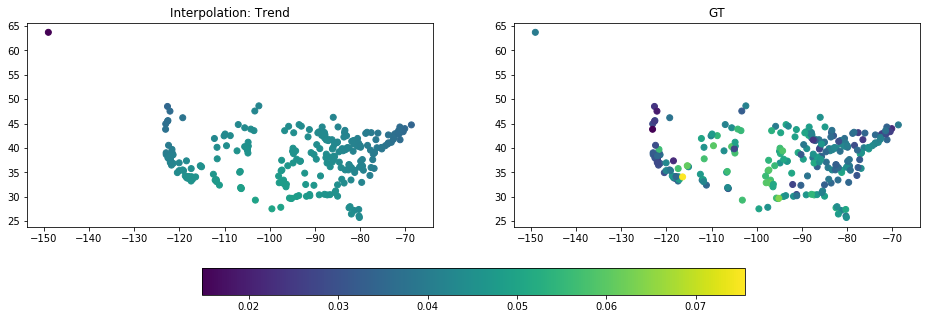

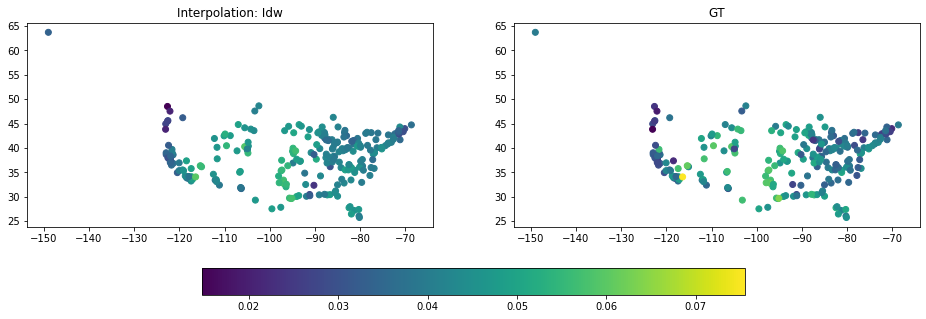

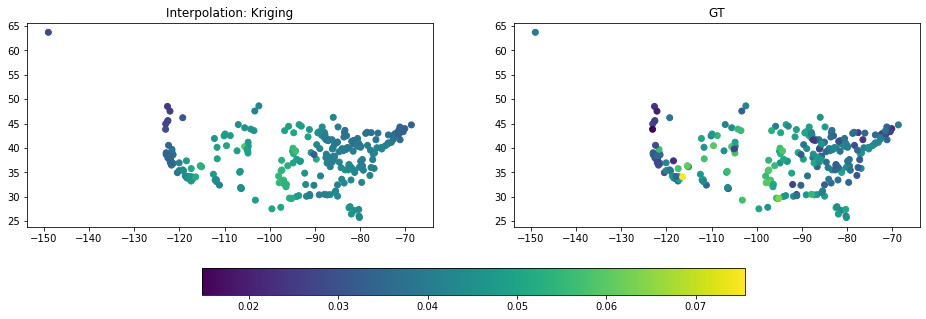

[00:48:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


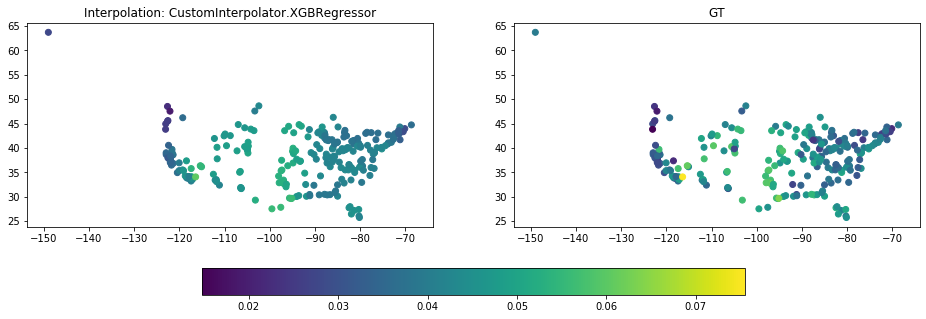

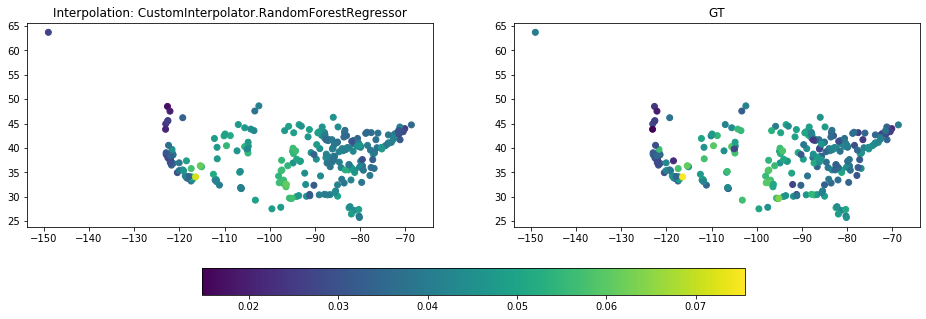

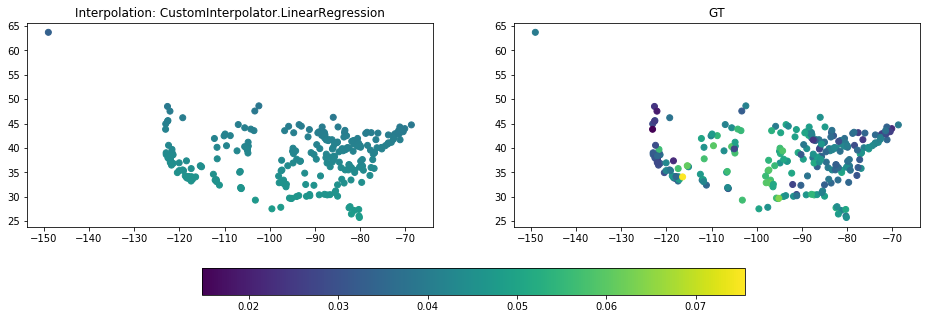

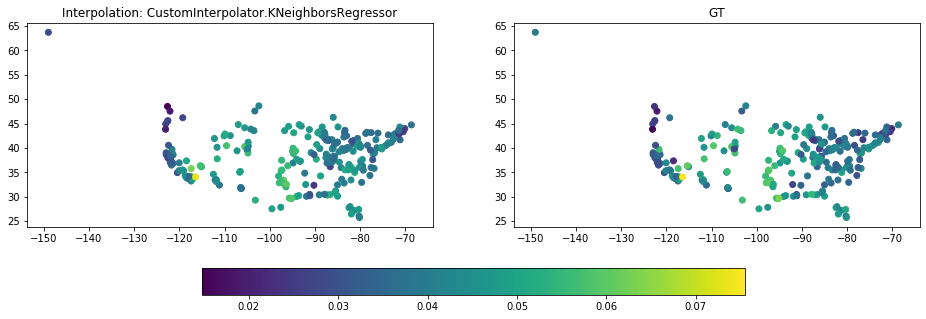

/home/apoorv/Desktop/github/polire/.env/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.61252415]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 67, 'nit': 5, 'warnflag': 2}
  ConvergenceWarning)


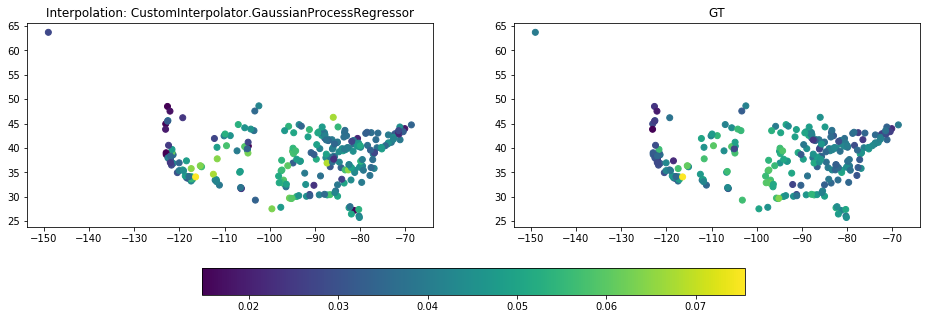

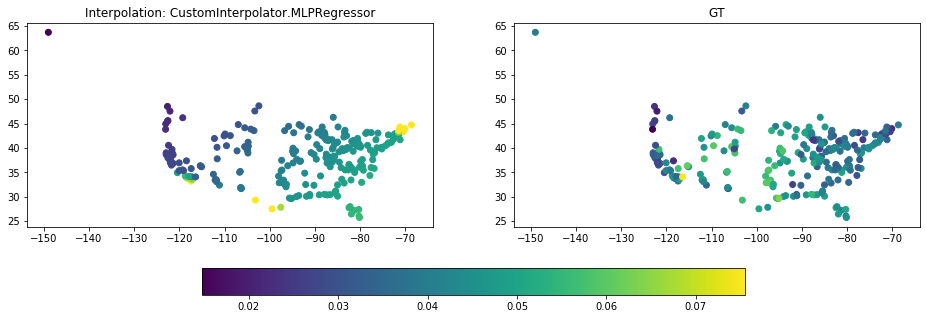

In [15]:
for r in lss:
    r.fit(trainX, trainy)
    try:
        fig, ax = plt.subplots(ncols=2, sharex=True, figsize=(16, 5))
        pred_y = r.predict(testX)
        outputs.append(pred_y)
        vmin = min(testy)
        vmax = max(testy)
        norm = colors.Normalize(vmin=vmin, vmax=vmax)
        inter = ax[0].scatter(testX[:, 0], testX[:, 1], c = pred_y)
        ax[0].set_title(f"Interpolation: {r}")
        gt = ax[1].scatter(testX[:, 0], testX[:, 1], c = testy)
        
        # normalize colorbar
        inter.set_norm(norm)
        gt.set_norm(norm)
        fig.colorbar(gt, ax=ax, orientation='horizontal', fraction=.1)
        
        ax[1].set_title("GT")
        plt.show()
        
    except NotImplementedError as e:
        print (f"Was not able to. for {r}!")
        print(str(e))

In [16]:
from sklearn.metrics import (
    r2_score, mean_absolute_error, 
    mean_squared_error
)

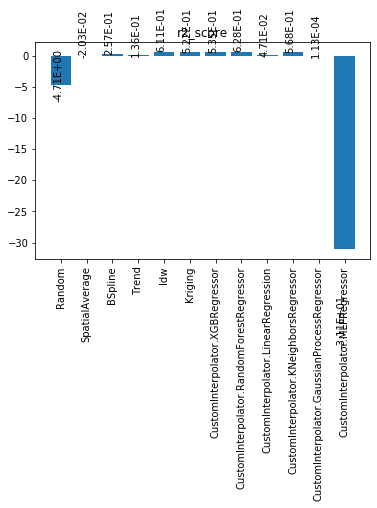

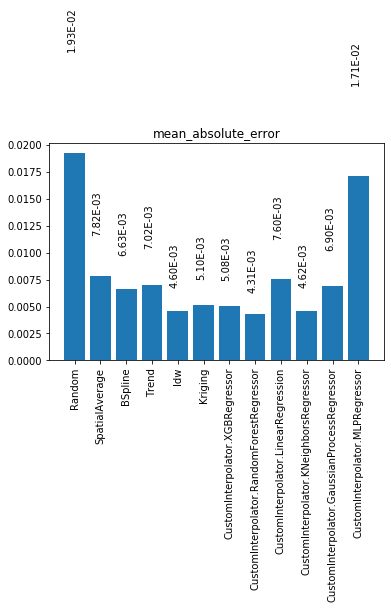

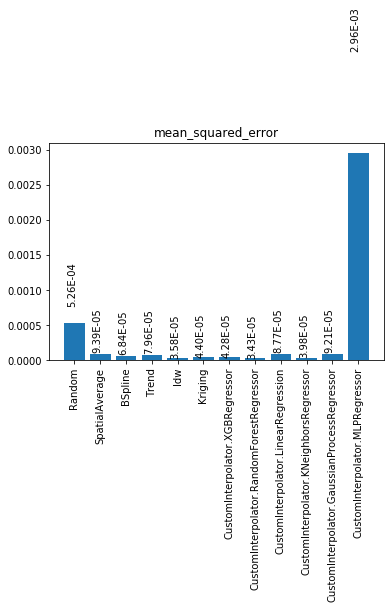

In [17]:
metrics = [
    r2_score,
    mean_absolute_error, 
    mean_squared_error
]

temp2 = range(len(lss))
for metric in metrics:
    metric_vals = [metric(testy, output) for output in outputs]
    plt.bar(temp2, metric_vals, label=metric.__name__)
    plt.xticks(temp2, [l for l in lss], rotation='vertical')
    plt.title(metric.__name__)
    for i, metric_val in enumerate(metric_vals):
        plt.text(i-0.3, metric_val + .5 * metric_val,
                 "%.2E" % metric_val, rotation="vertical")
    plt.show()
    

In [ ]:
# import itertools
# for i, out in enumerate(outputs):
#     list(zip(range(len(lss)), outputs)), 
#     3):
#     ix0 = comb[0][0]
#     ix1 = comb[1][0]
#     if ix0 == 0 or ix1 == 0:
#         continue # we don't care about random
#     plt.scatter(outputs[ix0], outputs[ix1])
#     plt.xlabel(lss[ix0])
#     plt.ylabel(lss[ix1])
#     corr = np.correlate(comb[0][1], comb[1][1]).item()
#     plt.title('Correlation: %1.2f' % corr)
#     plt.show()


In [20]:
lims = 1, 3, 3, 5
resolution = 12
x1min, x1max, x2min, x2max = lims
x1 = np.linspace(x1min, x1max, resolution)
x2 = np.linspace(x2min, x2max, resolution)
X1, X2 = np.meshgrid(x1, x2)